In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv', header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### Data Cleaning

In [5]:
data[data.isna().any(axis="columns")]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
data.loc[:122, 'Region'] = 0
data.loc[122:, 'Region'] = 1

In [7]:
data['Region'] = data['Region'].astype(int)

In [8]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


#### Remove the columns with null values!

In [10]:
data.dropna(inplace=True, axis='index', how="any")

In [11]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [12]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [14]:
data.reset_index(inplace=True)

In [15]:
data.index

RangeIndex(start=0, stop=244, step=1)

In [16]:
data.loc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
data.drop(122, inplace=True)

In [18]:
data.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243],
      dtype='int64', length=243)

In [19]:
data.reset_index(inplace=True)

In [20]:
data.index

RangeIndex(start=0, stop=243, step=1)

In [21]:
data.loc[[122]]

,level_0,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [22]:
data.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws',
       'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ',
       'Region'],
      dtype='object')

### Fix spaces in column names

In [23]:
data.columns = data.columns.str.strip()

In [24]:
data.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws',
       'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### change the data-types of columns

In [25]:
data[['month', 'year', 'Temperature', 'RH', 'Ws']] = data[['month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   index        243 non-null    int64 
 2   day          243 non-null    object
 3   month        243 non-null    int64 
 4   year         243 non-null    int64 
 5   Temperature  243 non-null    int64 
 6   RH           243 non-null    int64 
 7   Ws           243 non-null    int64 
 8   Rain         243 non-null    object
 9   FFMC         243 non-null    object
 10  DMC          243 non-null    object
 11  DC           243 non-null    object
 12  ISI          243 non-null    object
 13  BUI          243 non-null    object
 14  FWI          243 non-null    object
 15  Classes      243 non-null    object
 16  Region       243 non-null    int64 
dtypes: int64(8), object(9)
memory usage: 32.4+ KB


In [27]:
objects = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [28]:
objects

['day', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [29]:
for i in objects:
    if i != 'Classes':
        data[i] = data[i].astype(float)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      243 non-null    int64  
 1   index        243 non-null    int64  
 2   day          243 non-null    float64
 3   month        243 non-null    int64  
 4   year         243 non-null    int64  
 5   Temperature  243 non-null    int64  
 6   RH           243 non-null    int64  
 7   Ws           243 non-null    int64  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    float64
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    float64
 15  Classes      243 non-null    object 
 16  Region       243 non-null    int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 32.4+ KB


In [31]:
data.describe()

,level_0,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,121.497942,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,70.726594,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,0.000000,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,182.500000,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,243.000000,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### save cleaned dataset

In [32]:
data.to_csv('cleaned_algerian_dataset.csv', index=False)

### EDA (Exploratory data analysis)

In [33]:
df = data

In [34]:
df.drop(['level_0', 'index'], axis="columns", inplace=True)

### Encoding Categories

In [35]:
# df['Classes'] = np.where(df['Classes'] == 'not fire', 0, 1)
df['Classes'] = df['Classes'].str.strip()
# df['Classes'].value_counts()

In [36]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [37]:
df['Classes'] = np.where(df['Classes'] == 'not fire', 0, 1)

In [38]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27.0,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28.0,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29.0,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [39]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

### Density plot for all features

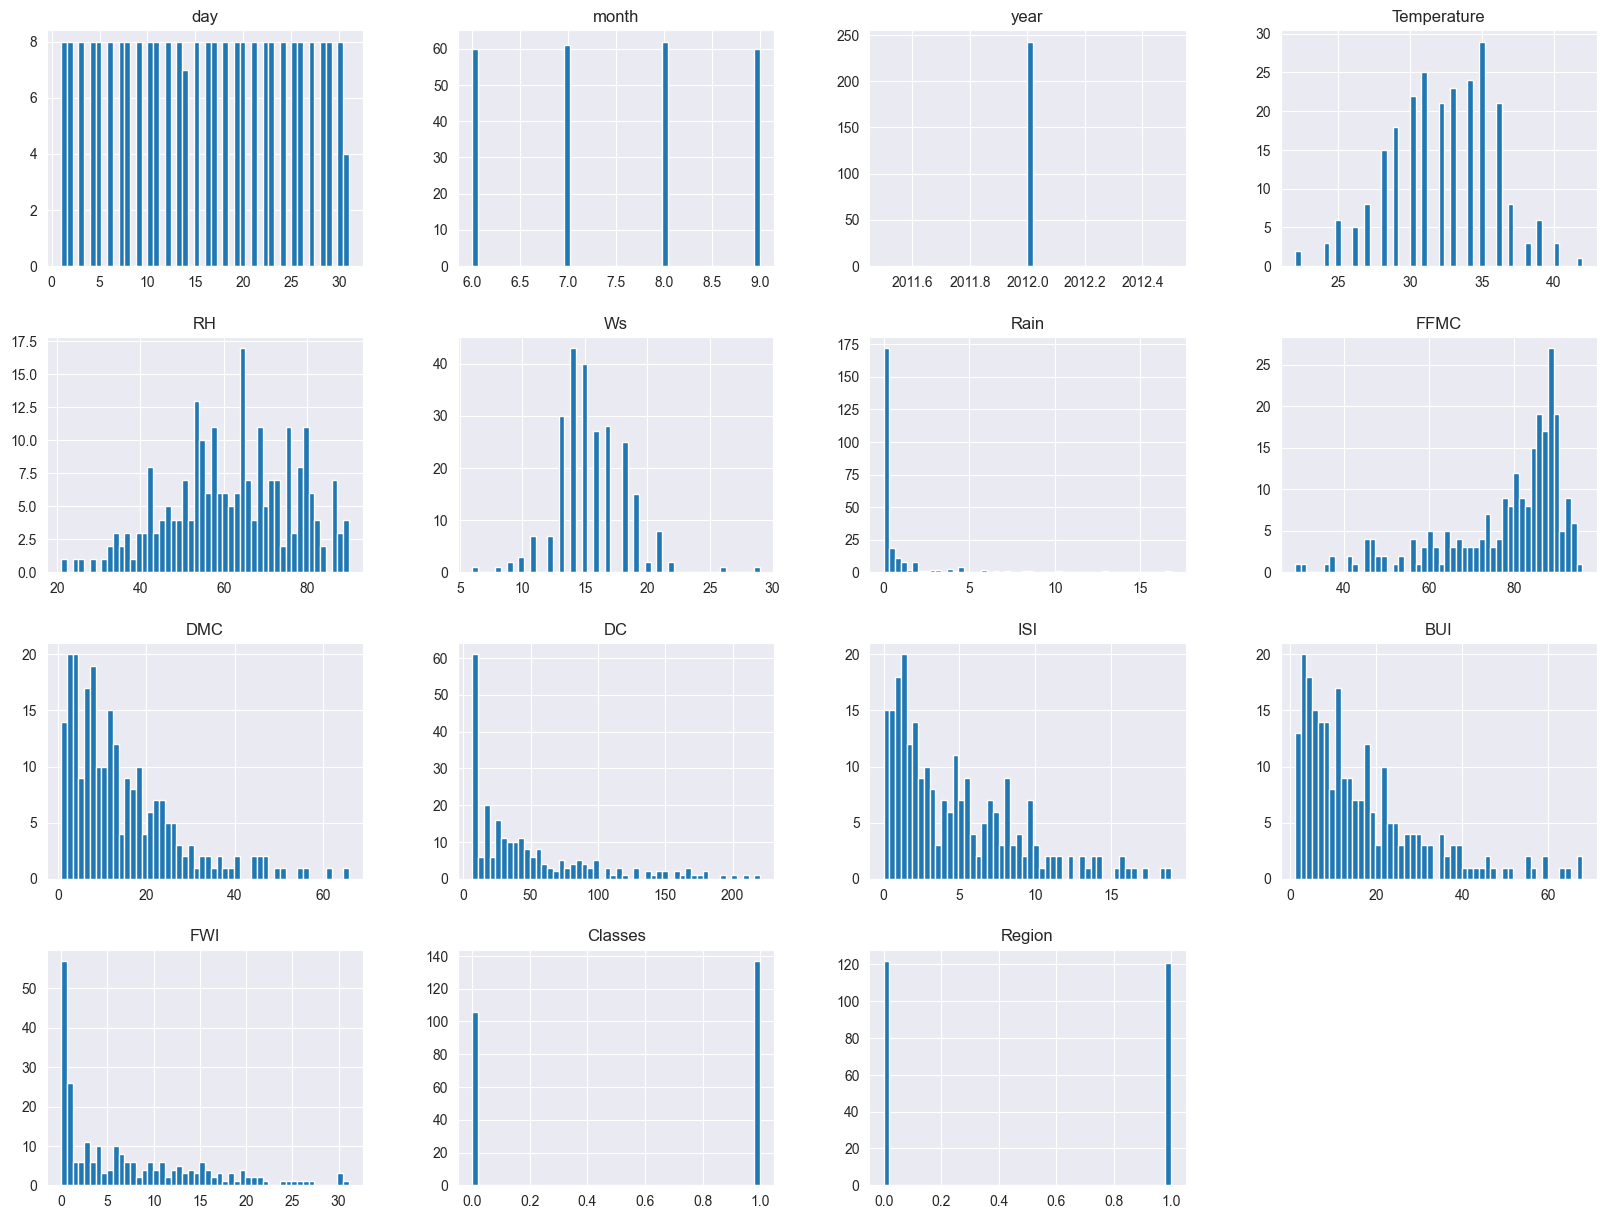

In [40]:
sns.set_style('darkgrid')
df.hist(bins=50, figsize=(20, 15))
plt.show()

### Percentage for pie chart

In [41]:
perecentages = df['Classes'].value_counts(normalize=True) * 100

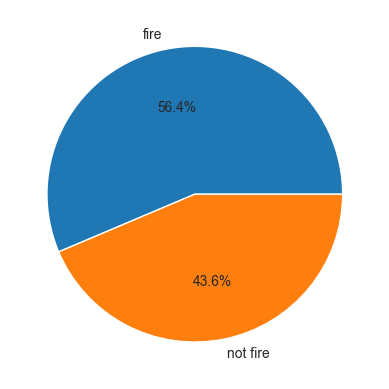

In [42]:
classlabels = ['fire', 'not fire']

plt.pie(perecentages, labels=classlabels, autopct="%.1f%%")
plt.show()

### Correlations

In [43]:
correlations = df.corr()

<Axes: >

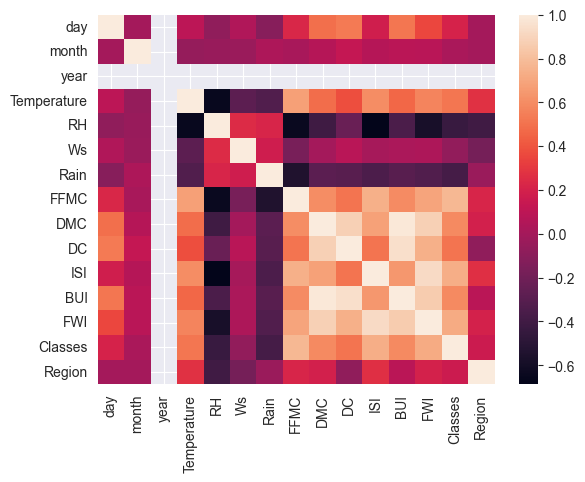

In [44]:
sns.heatmap(correlations)

### Boxplot to check outliers

<Axes: ylabel='FWI'>

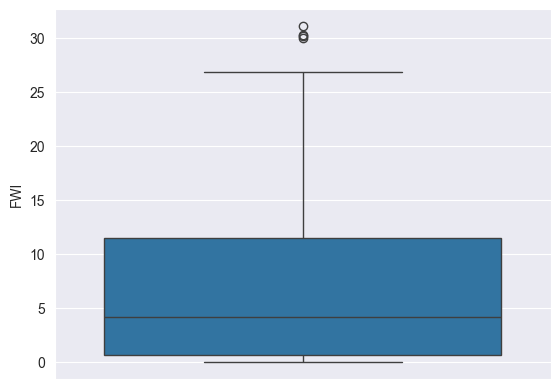

In [45]:
sns.boxplot(df['FWI'])

## Monthly fire analysis

<Axes: xlabel='month', ylabel='count'>

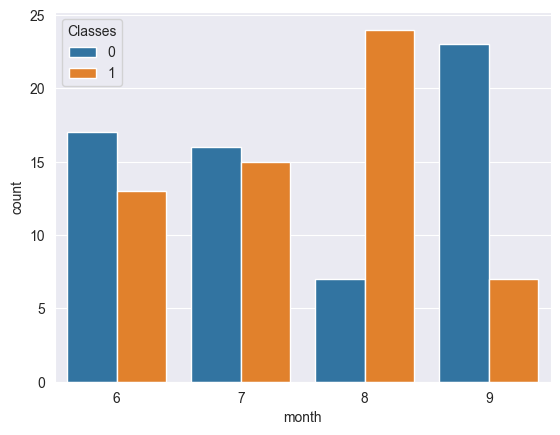

In [53]:
df_temp = df[df['Region'] == 0]
sns.countplot(x='month', hue="Classes", data=df_temp)

<Axes: xlabel='month', ylabel='count'>

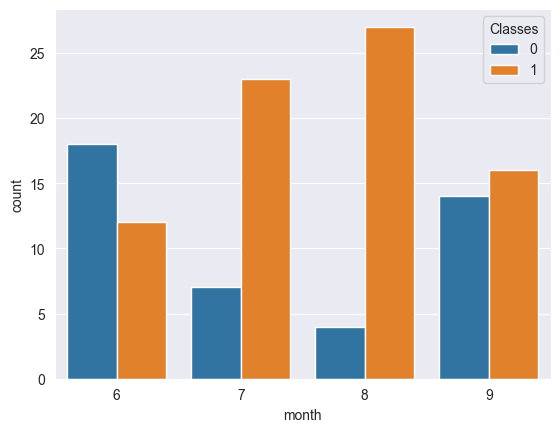

In [54]:
df_temp = df[df['Region'] == 1]
sns.countplot(x='month', hue="Classes", data=df_temp)